In [5]:
cd ..

/home/spotlight/git/deeplearning-seminar/code


In [6]:
%load_ext autoreload

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [7]:
%autoreload 2

In [20]:
from Network import VAE
import seaborn as sns

In [9]:
arch = [784,512,512,50]

In [15]:
v = VAE.VAE(arch=arch, name='784-512-512-50-v2', learning_rate=0.001)

Building tensorflow graph with the following hyper parameters:
	batch_size: 128
	learning_rate: 0.001
	nonlin: <function relu at 0x7fb629855e18>
	squash: <function sigmoid at 0x7fb629a319d8>
	arch: [784, 512, 512, 50]
With the following network architecture: [784,512,512,50]
Done constructing network


In [16]:
v.saver

In [17]:
import input_data
mnist = input_data.read_data_sets('MNIST_data', one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [18]:
loss = list(v.train(mnist, num_epochs=500))

[**] Begin training: 12:29:04.702253
epoch 0: train cost: 181.6275772017045 | test cost: 133.5984458984375
epoch 1: train cost: 129.15008087713065 | test cost: 117.8356794921875
epoch 2: train cost: 117.44937860440339 | test cost: 113.12284238281252
epoch 3: train cost: 112.95122743252848 | test cost: 111.92238027343745
epoch 4: train cost: 110.24694277343745 | test cost: 109.1393020507813
epoch 5: train cost: 108.13637888849436 | test cost: 110.14317402343751
epoch 6: train cost: 106.6139031072442 | test cost: 104.2117818359375
epoch 7: train cost: 105.38728062855111 | test cost: 107.64733681640627
epoch 8: train cost: 104.524393412642 | test cost: 107.17029648437499
epoch 9: train cost: 103.70760287642042 | test cost: 102.1348405273437
epoch 10: train cost: 103.066551171875 | test cost: 100.23112695312498
epoch 11: train cost: 102.47498694957396 | test cost: 100.03792001953128
epoch 12: train cost: 101.98853977272726 | test cost: 99.58052021484373
epoch 13: train cost: 101.5609031605

In [80]:
v.batch_size

128

In [ ]:
#mnist = input_data.read_data_sets('MNIST_data', one_hot=False)
import csv
num_samples = 500000
num_epochs = num_samples // 55000
f = open('data_viz.csv', 'w')
writer = csv.writer(f)
for i in range(0, num_epochs):
    raw, labels = mnist.train.next_batch(55000)
    for raw, label in zip(raw, labels):
        z_mean, z_log_sigma = v.encode(raw.reshape(1, 784))
        data.append([label, z_mean[0][0], z_mean[0][1], z_mean[0][2]])
    print("encoded one epoch worth of data (55000 samples)")
print("lets go")
writer.writerows(data)
print("done writing")
f.close()

In [ ]:
mnist.train.num_examples

In [31]:
raw, labels = mnist.test.next_batch(1)

In [37]:
z = v.encode(raw)
np.set_printoptions(precision=5)

In [54]:
print("dim #20: mean: {}, sigma: {}".format(z[0][0,20], z[1][0,20]))

dim #20: mean: -1.0636762380599976, sigma: -0.6982788443565369


In [25]:
import numpy as np
loss2 = np.array(loss)

In [133]:
x1 = range(0,5)
x2 = range(0,5)
manifold = np.zeros(shape=(len(x1)*28, len(x2)*28))
for i_x, x in enumerate(x1):
    for i_y, y in enumerate(x2):
        img = v.decode()
        manifold[i_x*28:(i_x+1)*28,i_y*28:(i_y+1)*28] = img.reshape(28,28)
plt.imshow(manifold, cmap=plt.cm.gray_r)
plt.axis('off')
plt.tight_layout()
plt.savefig('vae_samples_close_2dim.pdf')

AttributeError: 'Variable' object has no attribute 'decode'

NameError: name 'FormatStrFormatter' is not defined

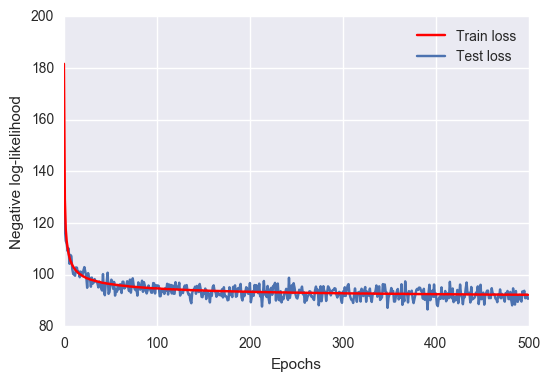

In [28]:
import matplotlib.pyplot as plt
sns.set_style("darkgrid")
test_loss, = plt.plot(loss2[:,0], loss2[:,2], label = 'Test loss')
train_loss, = plt.plot(loss2[:,0], loss2[:,1], label = 'Train loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Negative log-likelihood')
plt.legend(handles=[train_loss, test_loss])
formatter = FormatStrFormatter('%d')
plt.gca().get_xaxis().set_major_formatter(formatter)
plt.savefig(self.get_pdf('loss'))
sns.set_style(None)
# also save loss to file
np.savetxt(os.path.join(self.results_dir, 'loss.np'), loss)
plt.close()

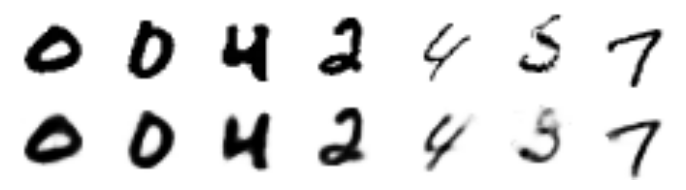

In [33]:
from random import choices
n = 7  # how many digits we will display
mnist.test.next_batch(n)
images = choices(mnist.test.images,k=n)

#plt.axis('off')
#plt.tight_layout()



plt.figure(figsize=(7, 2))
for i in range(n):
    reconstructed = v.end_to_end(images[i].reshape(1,784))
    
    # display original
    ax = plt.subplot(2, n, i + 1)
    plt.imshow(images[i].reshape(28, 28), cmap=plt.cm.gray_r)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    ax = plt.subplot(2, n, i + 1 + n)
    plt.imshow(reconstructed.reshape(28, 28), cmap=plt.cm.gray_r)
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.tight_layout()
#plt.savefig('reconstructions_2dim.pdf')
plt.show()

In [88]:
from random import choices

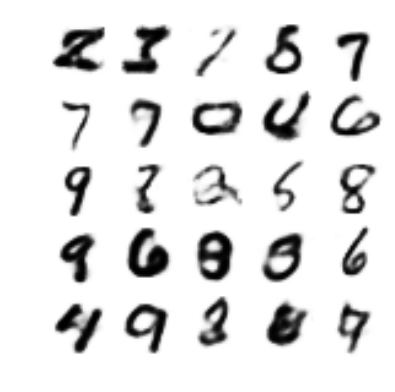

In [31]:
"""Generate a plot with generated samples (from latent space)"""
x1 = range(0,5)
x2 = range(0,5)
manifold = np.zeros(shape=(len(x1)*28, len(x2)*28))
for i_x, x in enumerate(x1):
    for i_y, y in enumerate(x2):
        img = v.decode()
        manifold[i_x*28:(i_x+1)*28,i_y*28:(i_y+1)*28] = img.reshape(28,28)
plt.imshow(manifold, cmap=plt.cm.gray_r)
plt.axis('off')
plt.tight_layout()

In [145]:
sess

In [135]:
sess_2dim = v

In [146]:
v.sess

AttributeError: 'Variable' object has no attribute 'sess'

In [149]:
v.sess = sess

In [150]:
v.decode()

ValueError: Fetch argument <tf.Tensor 'fully_connected_4_2/fully_connected/Sigmoid:0' shape=(?, 784) dtype=float32> cannot be interpreted as a Tensor. (Tensor Tensor("fully_connected_4_2/fully_connected/Sigmoid:0", shape=(?, 784), dtype=float32) is not an element of this graph.)